In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 

In [24]:
!wget 'https://drive.google.com/uc?export=download&id=1WrbvqsWUUlqFStXHyFmrzBmr-1E99lf9' -O Data_Negara_HELP.csv

--2021-04-18 03:03:38--  https://drive.google.com/uc?export=download&id=1WrbvqsWUUlqFStXHyFmrzBmr-1E99lf9
Resolving drive.google.com (drive.google.com)... 172.217.164.14, 2607:f8b0:4025:803::200e
Connecting to drive.google.com (drive.google.com)|172.217.164.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5rus0f5i9nrs3s5shb4fjq1lo3cigdnt/1618714950000/06287560445691811212/*/1WrbvqsWUUlqFStXHyFmrzBmr-1E99lf9?e=download [following]
--2021-04-18 03:03:38--  https://doc-08-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5rus0f5i9nrs3s5shb4fjq1lo3cigdnt/1618714950000/06287560445691811212/*/1WrbvqsWUUlqFStXHyFmrzBmr-1E99lf9?e=download
Resolving doc-08-7g-docs.googleusercontent.com (doc-08-7g-docs.googleusercontent.com)... 172.217.15.225, 2607:f8b0:4025:802::2001
Connecting to doc-08-7g-docs.googleusercontent.com (doc-08-7g-docs.

Read CSV

In [25]:
df_train = pd.read_csv('Data_Negara_HELP.csv')

df_train

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Eksplorasi

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [27]:
df_train2 = df_train.drop(['Negara'], axis=1)

Korelasi Data

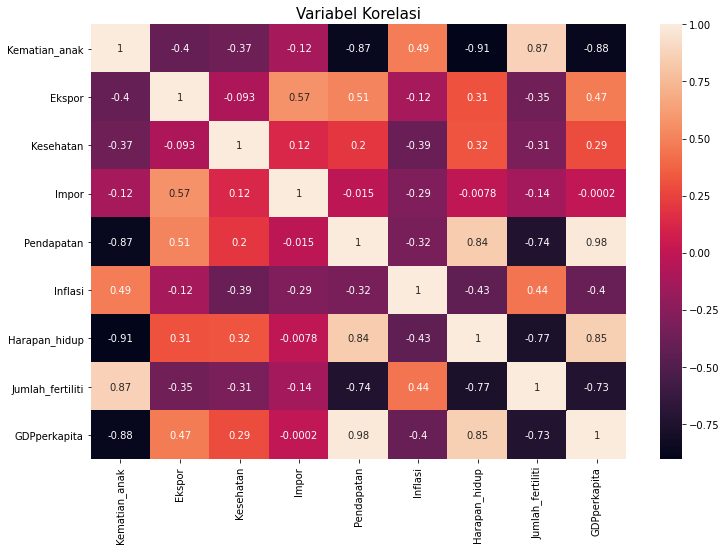

In [28]:
import seaborn as sns

plt.figure(figsize=(12,8))
dftrain_corr = df_train2.corr(method='spearman')
sns.heatmap(dftrain_corr, annot=True)
plt.title('Variabel Korelasi', size = 15)
plt.show()

Feature Engineering

In [29]:
columns = np.full((dftrain_corr.shape[0],), True, dtype=bool)
for i in range(dftrain_corr.shape[0]):
    for j in range(i+1, dftrain_corr.shape[0]):
        if dftrain_corr.iloc[i,j] >= -0.2:
            if columns[j]:
                columns[j] = False
selected_columns = df_train2.columns[columns]
dftrain_features = df_train2[selected_columns]

In [30]:
dftrain_features

,Kematian_anak,Ekspor
0,90.2,10.0
1,16.6,28.0
2,27.3,38.4
3,119.0,62.3
4,10.3,45.5
...,...,...
162,29.2,46.6
163,17.1,28.5
164,23.3,72.0
165,56.3,30.0


Handling Outliers

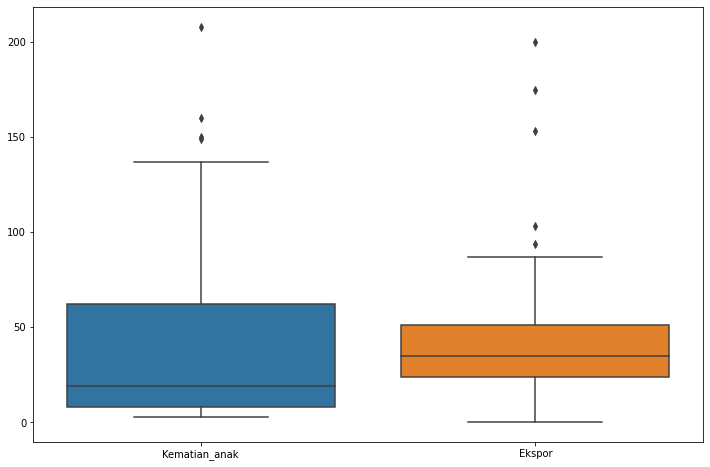

In [31]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(data=dftrain_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


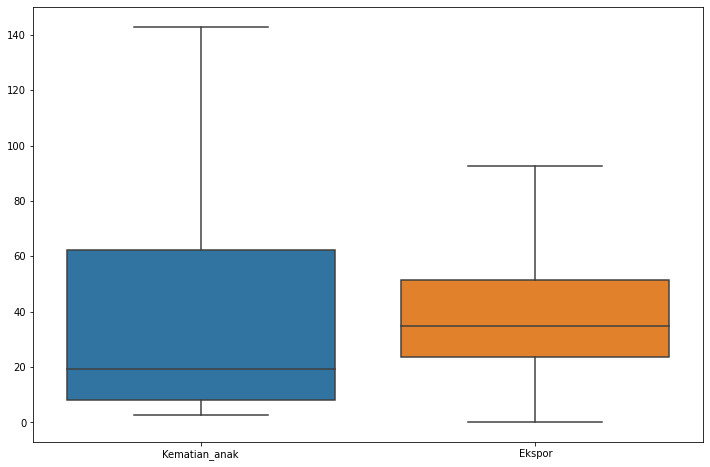

In [32]:
def apply(x):
  if x > ub:
    return ub
  elif x < lb:
    return lb
  else:
    return x

q1 = dftrain_features['Kematian_anak'].quantile(0.25)
q3 = dftrain_features['Kematian_anak'].quantile(0.75)
iqr = q3 - q1

lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

dftrain_features['Kematian_anak'] = dftrain_features['Kematian_anak'].apply(apply)

q1 = dftrain_features['Ekspor'].quantile(0.25)
q3 = dftrain_features['Ekspor'].quantile(0.75)
iqr = q3 - q1

lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

dftrain_features['Ekspor'] = dftrain_features['Ekspor'].apply(apply)

plt.figure(figsize=(12,8))
sns.boxplot(data=dftrain_features)

Scalling

In [33]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler().fit_transform(dftrain_features)
dftrain_scal = pd.DataFrame(scal, columns=['Kematian_anak','Ekspor'])

dftrain_scal

,Kematian_anak,Ekspor
0,1.369802,-1.391107
1,-0.550464,-0.543547
2,-0.271295,-0.053846
3,2.121210,1.071524
4,-0.714835,0.280469
...,...,...
162,-0.221723,0.332264
163,-0.537419,-0.520004
164,-0.375657,1.528265
165,0.485332,-0.449374


Evaluation dengan Elbow Method

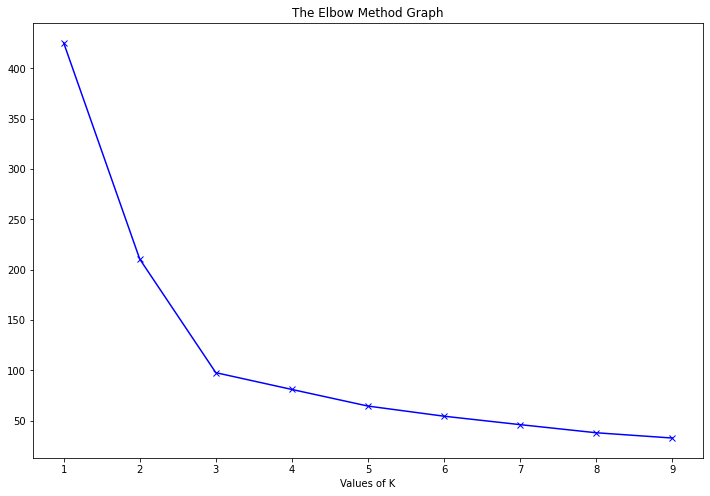

In [55]:
from sklearn.cluster import KMeans
#Elbow Method
inertias = []
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(dftrain_scal)
    kmeanModel.fit(dftrain_scal)
 
    inertias.append(kmeanModel.inertia_)
    mapping2[k] = kmeanModel.inertia_

plt.figure(figsize=(12,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.title('The Elbow Method Graph')
plt.show()

Clustering

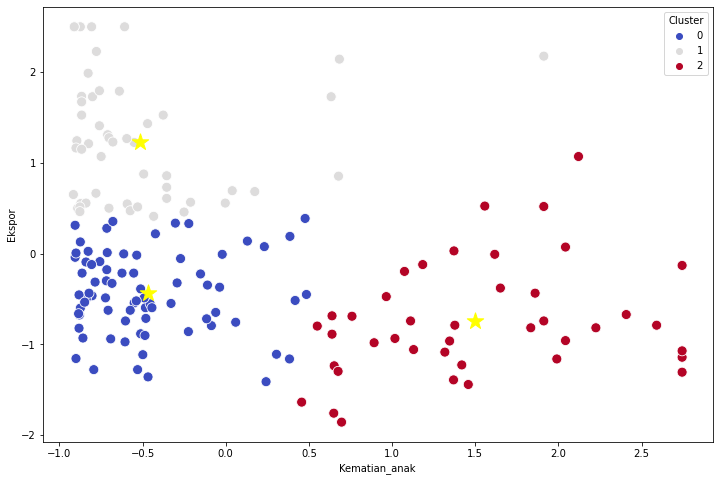

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

km2 = KMeans(n_clusters=3).fit(dftrain_scal)
dftrain_scal['Cluster'] = km2.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=dftrain_scal['Kematian_anak'],
    y=dftrain_scal['Ekspor'],
    hue=dftrain_scal['Cluster'],
    legend=True,
    s=100,
    palette='coolwarm'
)

centers = km2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='yellow', s=300, alpha=1 , marker='*')

Hasil Akhir

In [64]:
databarin = pd.DataFrame([df_train['Negara'], dftrain_scal['Cluster']])
databarin = databarin.transpose()

In [65]:
databarin[databarin['Cluster'] == 2]['Negara']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
40                Cote d'Ivoire
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
69                        India
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
107                     Myanmar
112                       Niger
113                     Nigeria
116     